<a href="https://colab.research.google.com/github/marcelorandolfo/medium/blob/master/histograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Descomplicando a estatística - Histograma

In [0]:
# importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# definindo estilo do seaborn
sns.set()

In [0]:
## doenças cardíacas

# url dos datasets
data = 'https://raw.githubusercontent.com/marcelorandolfo/data-science/master/data/heart_disease.csv'

# importar dataset da UCI
df = pd.read_csv(data)

# visualizar as primeiras 5 entradas
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [0]:
# converter valores diferentes de zero em 1
df.loc[df.num != 0, 'num'] = 1

# selecionar somente pacientes com doença cardíaca
df_disease = df[df['num'] == 1]

# visualizar cinco primeiras entradas
df_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [0]:
# obtendo o describe para idade
df_disease[['age','num']].describe()

,age,num
count,139.000000,139.0
mean,56.625899,1.0
std,7.938416,0.0
min,35.000000,1.0
25%,52.000000,1.0
50%,58.000000,1.0
75%,62.000000,1.0
max,77.000000,1.0


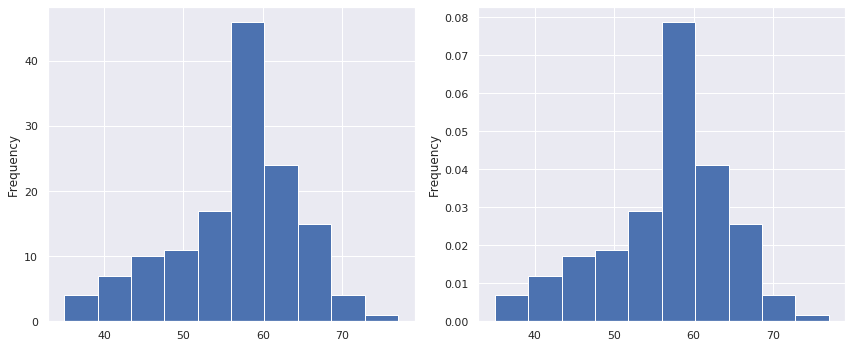

In [0]:
# plotando dois histogramas simples

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# histograma idade
df_disease['age'].plot(kind="hist", ax=ax[0])
df_disease['age'].plot(kind="hist", ax=ax[1], density = True)

fig.tight_layout();

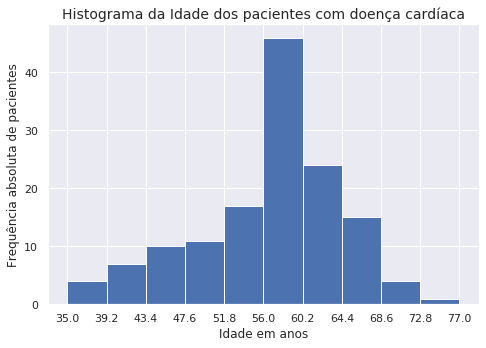

In [0]:
# plotando histograma de frequência absoluta
fig, ax = plt.subplots(figsize=(7,5))

# histograma idade
count, bin_edges = np.histogram(df_disease['age'])
df_disease['age'].plot(kind="hist", ax=ax, xticks=bin_edges)
ax.set_title('Histograma da Idade dos pacientes com doença cardíaca', fontsize=14)
ax.set_ylabel('Frequência absoluta de pacientes', fontsize = 12)
ax.set_xlabel('Idade em anos', fontsize = 12)

fig.tight_layout();

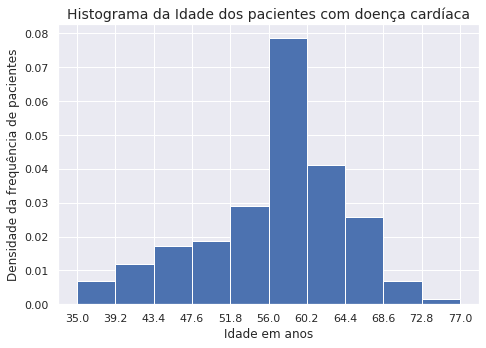

In [0]:
# plotando histograma de desnidade da frequência
fig, ax = plt.subplots(figsize=(7,5))

# histograma idade
count, bin_edges = np.histogram(df_disease['age'])
df_disease['age'].plot(kind="hist", ax=ax, xticks=bin_edges, density = True)
ax.set_title('Histograma da Idade dos pacientes com doença cardíaca', fontsize=14)
ax.set_ylabel('Densidade da frequência de pacientes', fontsize = 12)
ax.set_xlabel('Idade em anos', fontsize = 12)

fig.tight_layout();

In [0]:
print('Número de pacientes: {}'.format(df_disease['age'].shape[0]))

Número de pacientes: 139


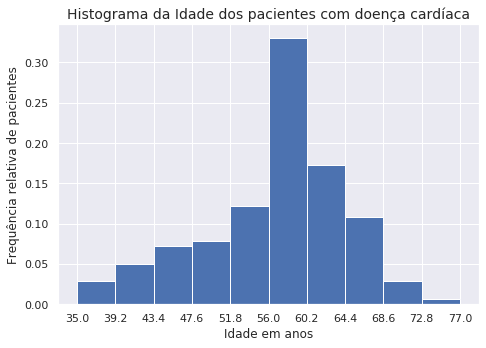

In [0]:
# plotando histograma de frequência relativa
fig, ax = plt.subplots(figsize=(7,5))

# histograma idade
count, bin_edges = np.histogram(df_disease['age'])
total_pacientes = df_disease['age'].shape[0]
matriz_zeros = np.zeros_like(df_disease['age'])
pesos =  (matriz_zeros + 1) / total_pacientes
df_disease['age'].plot(kind="hist", ax=ax, xticks=bin_edges, 
                       weights = pesos)

ax.set_title('Histograma da Idade dos pacientes com doença cardíaca', fontsize=14)
ax.set_ylabel('Frequência relativa de pacientes', fontsize = 12)
ax.set_xlabel('Idade em anos', fontsize = 12)

fig.tight_layout();

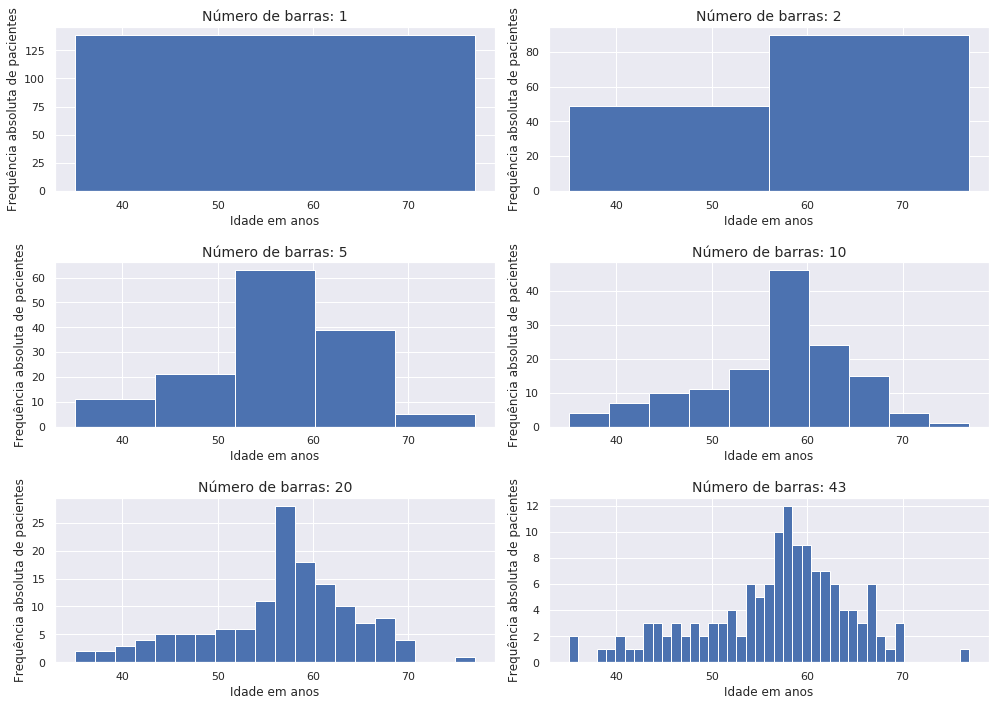

In [0]:
# multiplot de histogramas para diferentes números de barras
bins = [1,2,5,10,20,43]

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (14,10))

idx = 0
for nbin in bins:
  idx += 1
  plt.subplot(3, 2, idx)
  df_disease['age'].plot(kind="hist", bins = nbin)
  plt.ylabel('Frequência absoluta de pacientes', fontsize = 12)
  plt.xlabel('Idade em anos', fontsize = 12)
  plt.title('Número de barras: {}'.format(nbin), fontsize = 14)
plt.tight_layout()

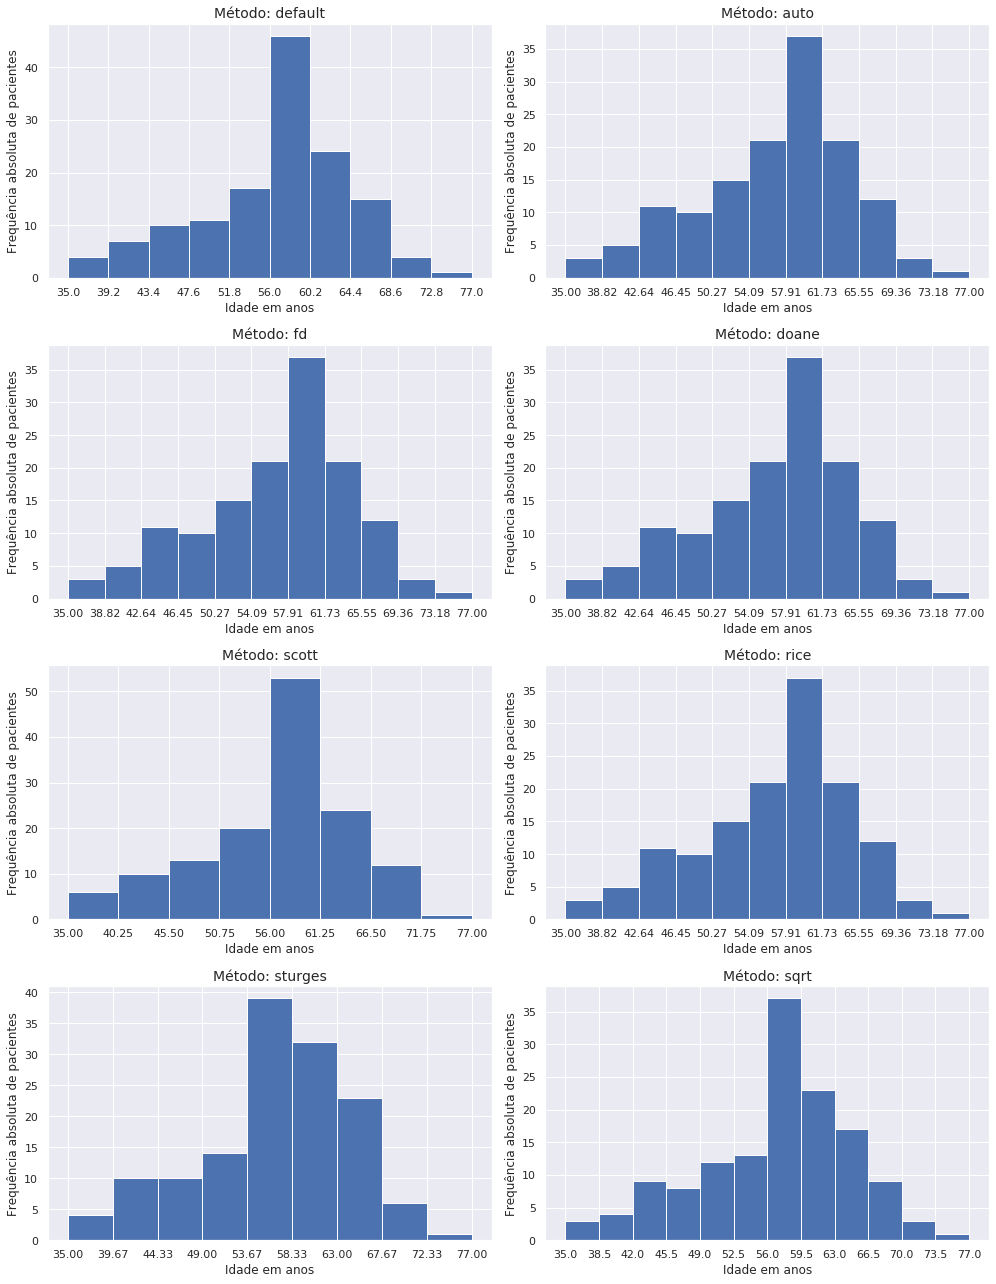

In [0]:
# multiplot de histogramas para diferentes métodos
mbin = [10, 'auto','fd','doane','scott','rice','sturges','sqrt']

fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (14,18))

idx = 0
for nbin in mbin:
  idx += 1
  plt.subplot(4, 2, idx)
  count, bin_edges = np.histogram(df_disease['age'], bins = nbin)
  bins = len(count)
  df_disease['age'].plot(kind="hist", bins = bins, xticks=bin_edges)
  plt.ylabel('Frequência absoluta de pacientes', fontsize = 12)
  plt.xlabel('Idade em anos', fontsize = 12)
  if nbin == 10:
    plt.title('Método: default', fontsize = 14)
  else:  
    plt.title('Método: {}'.format(nbin), fontsize = 14)
plt.tight_layout()


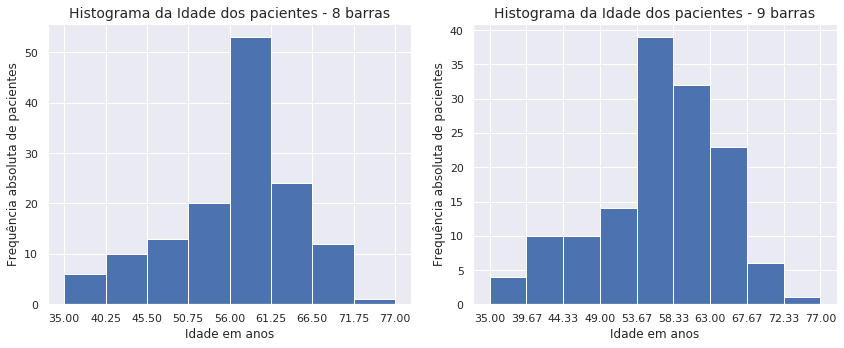

In [0]:
# plotando dois histogramas com 8 e 9 barras

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

count, bin_edges_8 = np.histogram(df_disease['age'], bins = 8)
count, bin_edges_9 = np.histogram(df_disease['age'], bins = 9)

df_disease['age'].plot(kind="hist", ax=ax[0], xticks=bin_edges_8, bins = 8)
ax[0].set_title('Histograma da Idade dos pacientes - 8 barras', fontsize=14)
ax[0].set_ylabel('Frequência absoluta de pacientes', fontsize = 12)
ax[0].set_xlabel('Idade em anos', fontsize = 12)

df_disease['age'].plot(kind="hist", ax=ax[1], xticks=bin_edges_9, bins = 9)
ax[1].set_title('Histograma da Idade dos pacientes - 9 barras', fontsize=14)
ax[1].set_ylabel('Frequência absoluta de pacientes', fontsize = 12)
ax[1].set_xlabel('Idade em anos', fontsize = 12)

fig.tight_layout();

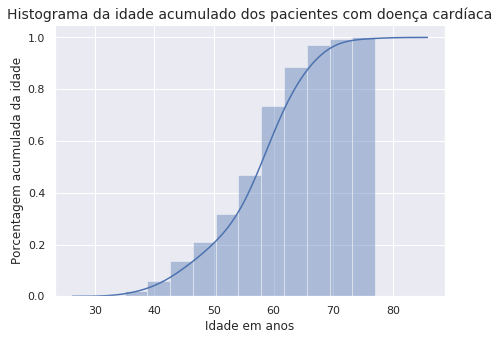

In [0]:
# histograma com distribuição cumulativa

fig, ax = plt.subplots(figsize=(7,5))

sns.distplot(df_disease['age'], ax=ax, 
             hist_kws = {'cumulative':True},
             kde_kws = {'cumulative':True})

sns.set_style("whitegrid")
ax.set(xlabel = 'Idade em anos', ylabel = 'Porcentagem acumulada da idade')
ax.set_title('Histograma da idade acumulado dos pacientes com doença cardíaca', fontsize=14)
plt.show();